# Headline analysis using Spacy!

In [1]:
import spacy
import os
import pandas as pd
import collections
import re
import seaborn as sns # For graphs
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv('inventory.csv')
df

,text
0,Distribution and causation of leprosy in Briti...
1,"Report of an outbreak of cholera in Suhutwar, ..."
2,Report of an investigation into the causes of ...
3,Account of plague administration in the Bombay...
4,Inquiry into the circumstances attending an ou...
...,...
463,Annual vaccination report of Bihar and Orissa ...
464,Vaccination in Burma 1889-1999 - 1889-1999 - I...
465,Vaccination in Burma 1900-1911 - 1900-1911 - I...
466,Vaccination in Burma 1912-1922 - 1912-1922 - I...


In [4]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df = cleandf

In [6]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]
ent = df['text'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = collections.Counter(ent)
count = counter.most_common()

<AxesSubplot:>

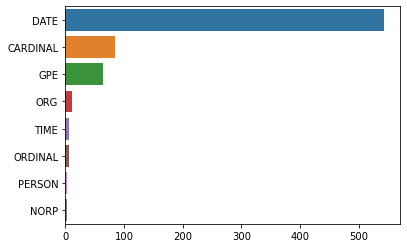

In [7]:
x,y = map(list,zip(*count))
sns.barplot(x=y,y=x)

/Users/tashfeen/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

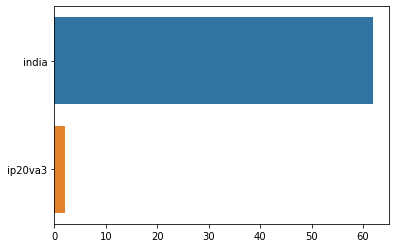

In [10]:
def nerGEO(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = df['text'].apply(lambda x: nerGEO(x))
gpe = [i for x in gpe for i in x]
counter = collections.Counter(gpe)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)